standard initial bookeeping

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

C:\Users\Micheal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


[[ -139    18]
 [ -215    34]
 [ -196     6]
 ...
 [ -523  -563]
 [ -765  -319]
 [-1002  -190]]


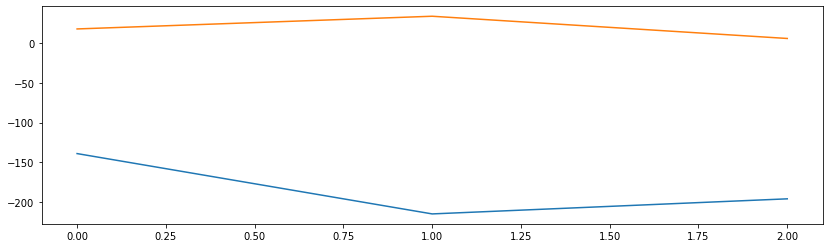

In [3]:
rate, s = wavfile.read('file_example_WAV_2MG.wav')
plt.plot(s[:3])
IPython.display.Audio(s[:6], rate= rate)
print(s)

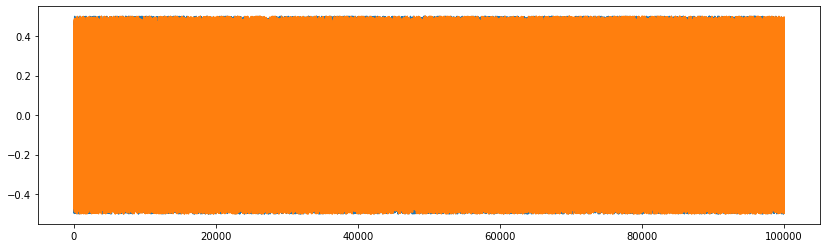

In [4]:
# the analog signal is simply rescaled between -100 and +100
# largest element in magnitude
signal_1 = [float(ele[0]) for ele in s[:100000]]


signal_2 = [float(ele[1]) for ele in s[:100000]]

norm_1 = 1.0 / max(np.abs([min(signal_1), max(signal_1)]))

sA_1 = []
for ele in signal_1:
    sA_1.append(100.0*ele*norm_1)

# the digital version is clamped to integers
sD_1 = np.round(sA_1)

norm_2 = 1.0 / max(np.abs([min(signal_2), max(signal_2)]))
sA_2 = []
for ele in signal_2:
    sA_2.append(100.0*ele*norm_2)

# the digital version is clamped to integers
sD_2 = np.round(sA_2)

plt.plot(sD_1 - sA_1)
plt.plot(sD_2 - sA_2)

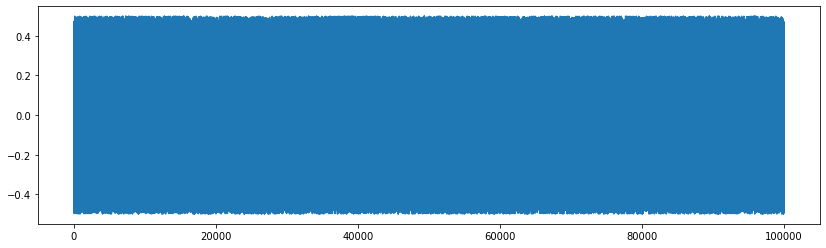

In [5]:
plt.plot(sD_1-sA_1)

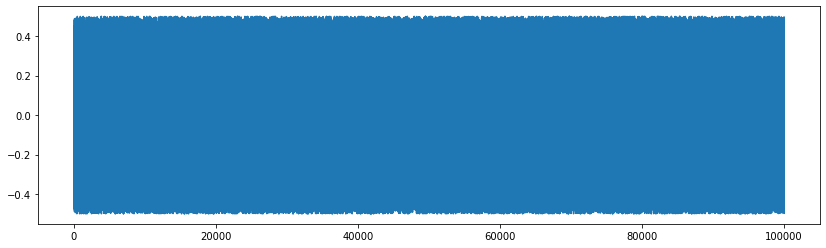

In [32]:
plt.plot(sD_2-sA_2)

In [7]:
#lets define a function to calculate the signal to noise ratio
def SNR(noisy, original):
    # power of error
    err = np.linalg.norm(original-noisy)
    #power of signal
    sig = np.linalg.norm(original)
    #SNR in dBs
    return 10*np.log10(sig/err)

print('SNR = %f dB' % SNR(sD_1, sA_1))


SNR = 17.688097 dB


In [30]:
IPython.display.Audio(sA_1, rate= rate)


In [31]:
IPython.display.Audio(sA_2, rate= rate)


In [10]:
IPython.display.Audio(sD_1, rate=rate)

Transmission
lets now define a function that represents the net effect of transmitting audio over cable segment terminated by a repeater

the signal is attenuated

the signal is accumulates additive noise as it propagates through the cable

the signal is amplified to the original amplitude by the repeater

In [20]:
def repeater(x, noise_amplitude, attenuation):
    # first lets create the noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    #attenuation
    for ele in x:
        ele = ele*attenuation
    #noise
    x=x+noise
    #gain compensation
    return x/attenuation

we can use the repeater for both analog and digital signals. Transmission of the analog signal is simply a sequence of repeaters:

In [21]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

In [22]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

In [24]:
NUM_REPEATERS = 70
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5

yA_1 = analog_tx(sA_1, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog transmission: SNR = %f dB' % SNR(yA_1, sA_1))    

yD_1 = digital_tx(sA_1, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital transmission: SNR = %f dB' % SNR(yD_1, sD_1))    


Analog transmission: SNR = -210.720951 dB
Digital transmission: SNR = -210.720687 dB


In [25]:
IPython.display.Audio(yA_1, rate=rate)

In [26]:
IPython.display.Audio(yD_1, rate=rate)

In [29]:
NOISE_AMPLITUDE = 0.3

yA_1 = analog_tx(sA_1, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA_1, sA_1))   

yD_1 = digital_tx(sD_1, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD_1, sD_1))   

Analog trasmission: SNR = -210.721635 dB
Digital trasmission: SNR = -210.721508 dB
